# Análisis de Sentimiento - Parte 2 (PCA)


Primero, bajemos los datos

In [1]:
!wget https://github.com/finiteautomata/imdb-dataset/raw/master/imdb_dataset.csv.zip
!unzip imdb_dataset.csv.zip

--2020-05-30 00:38:08--  https://github.com/finiteautomata/imdb-dataset/raw/master/imdb_dataset.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/finiteautomata/imdb-dataset/master/imdb_dataset.csv.zip [following]
--2020-05-30 00:38:08--  https://raw.githubusercontent.com/finiteautomata/imdb-dataset/master/imdb_dataset.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26962657 (26M) [application/zip]
Saving to: ‘imdb_dataset.csv.zip’

imdb_dataset.csv.zi 100%[===================>]  25.71M  42.7MB/s    in 0.6s    

2020-05-30 00:38:09 (42.7 MB/s) - ‘imdb_dataset.csv.zip’ saved [26962657/26

## Método de la Potencia

In [1]:
import numpy as np

def power_iteration(A, niter=1000, eps=1e-6):
    b = np.random.rand(A.shape[1])
    b = b / np.linalg.norm(b)

    for i in range(niter):
        old = b
        b = A @ b
        b = b / np.linalg.norm(b)

        # <a, b> = |a| |b| cos(angle)
        # -1 < cos(angle) < 1
        cos_angle = np.dot(b, old)
        if (1 - eps) < cos_angle <= 1:
            print(f"Paré en la iteración {i+1}")
            break

    eigenvalue = np.dot(b, A @ b)
    return eigenvalue, b


In [2]:
D = np.diag(range(5000, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

# Matriz ya diagonalizada
M = D



In [3]:
%%time
l, v = power_iteration(M, niter=1000, eps=1e-7)



CPU times: user 37 s, sys: 14.2 s, total: 51.2 s
Wall time: 51.3 s


In [4]:
l, v

(4998.071162523326,
 array([0.59514756, 0.47850136, 0.30614715, ..., 0.        , 0.        ,
        0.        ]))

In [ ]:


def eigen(A, num=2, **kwargs):
    A = A.copy()
    eigenvalues = []
    eigenvectors = np.zeros((A.shape[0], num))
    for i in range(num):
        print(f"Autovalor {i+1}")
        l, v = power_iteration(A, **kwargs)
        eigenvalues.append(l)
        eigenvectors[:, i] = v
        
        A = A - l * np.outer(v, v)
        
    return np.array(eigenvalues), eigenvectors


Veamos algunos ejemplos...

In [7]:
D = np.diag(range(1000, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

# Matriz ya diagonalizada
M = B.T @ D @ B

eigen(M, 10, niter=1000, eps=1e-6)

Autovalor 1
Paré en la iteración 264
Autovalor 2
Paré en la iteración 479
Autovalor 3
Paré en la iteración 444
Autovalor 4
Paré en la iteración 363
Autovalor 5
Paré en la iteración 445
Autovalor 6
Paré en la iteración 401
Autovalor 7
Paré en la iteración 557
Autovalor 8
Paré en la iteración 320
Autovalor 9
Paré en la iteración 340
Autovalor 10
Paré en la iteración 441


(array([999.22851723, 998.14358413, 998.12198757, 994.9198474 ,
        996.42284945, 994.21450082, 996.1572753 , 992.69502902,
        990.20715475, 992.33721378]),
 array([[-0.76423668,  0.55251185, -0.20096487, ...,  0.07870578,
          0.02896386, -0.03966811],
        [-0.47371245, -0.35078725,  0.78682323, ...,  0.04043572,
          0.01813748, -0.07429197],
        [-0.36408407, -0.48829496, -0.39857115, ..., -0.13066376,
         -0.00997835,  0.04712873],
        ...,
        [ 0.0044083 ,  0.00302146,  0.0017227 , ...,  0.00255541,
          0.00196088,  0.00187854],
        [ 0.0044083 ,  0.00302146,  0.0017227 , ...,  0.00255541,
          0.00196088,  0.00187854],
        [ 0.0044083 ,  0.00302146,  0.0017227 , ...,  0.00255541,
          0.00196088,  0.00187854]]))

## Volvamos a Análisis de Sentimiento

In [8]:
import pandas as pd 
import sklearn

df = pd.read_csv("IMDB Dataset.csv")
df = df.sample(frac=1, random_state=2020)

df_train = df[:10000]
df_test = df[10000:13000]

text_train, text_test = df_train["review"], df_test["review"]
label_train, label_test = df_train["sentiment"], df_test["sentiment"]

print("Class balance : {} pos {} neg".format(
    (label_train == 'positive').sum() / label_train.shape[0], 
    (label_train == 'negative').sum() / label_train.shape[0]
))
print("Cantidad de documentos: {}".format(df.shape[0]))

Class balance : 0.5007 pos 0.4993 neg
Cantidad de documentos: 50000


Veamos qué forma tienen los datos

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=4, max_df=0.80, max_features=6000, binary=True)

vect.fit(text_train)

X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

y_train = label_train# == 'positive' # Convertimos a vectores booleanos
y_test = label_test# == "positive"

## PCA

Vamos a ver una técnica para reducir la dimensionalidad y aún así mantener la mayor cantidad de información posible.

Recordemos que, dada X su matriz de covarianza $M_X$ es

$$ M_X = \frac{X^T X}{n-1} $$

En primer lugar, calculemos la matriz de covarianza de $X_{train}$

In [ ]:
import numpy as np

# Esto es porque me lo convierte a np.matrix si no
X = np.array(X_train - X_train.mean(axis=0))

cov_matrix = X.T @ X / (M.shape[0]-1) 

Usemos `np.linalg.eig` para diagonalizar la matriz

In [11]:
%%time
w, V = eigen(cov_matrix, num=50, niter=500, eps=1e-12)

Autovalor 1
Paré en la iteración 9
Autovalor 2
Paré en la iteración 20
Autovalor 3
Autovalor 4
Paré en la iteración 135
Autovalor 5
Paré en la iteración 120
Autovalor 6
Paré en la iteración 176
Autovalor 7
Paré en la iteración 213
Autovalor 8
Paré en la iteración 198
Autovalor 9
Autovalor 10
Paré en la iteración 251
Autovalor 11
Autovalor 12
Paré en la iteración 190
Autovalor 13
Paré en la iteración 266
Autovalor 14
Autovalor 15
Autovalor 16
Paré en la iteración 282
Autovalor 17
Autovalor 18
Autovalor 19
Autovalor 20
Autovalor 21
Autovalor 22
Autovalor 23
Autovalor 24
Autovalor 25
Autovalor 26
Autovalor 27
Autovalor 28
Autovalor 29
Autovalor 30
Autovalor 31
Autovalor 32
Autovalor 33
Autovalor 34
Autovalor 35
Autovalor 36
Autovalor 37
Autovalor 38
Autovalor 39
Autovalor 40
Autovalor 41
Autovalor 42
Autovalor 43
Autovalor 44
Autovalor 45
Autovalor 46
Autovalor 47
Autovalor 48
Autovalor 49
Autovalor 50
CPU times: user 16min 24s, sys: 15.5 s, total: 16min 40s
Wall time: 8min 28s


A ver los autovalores...

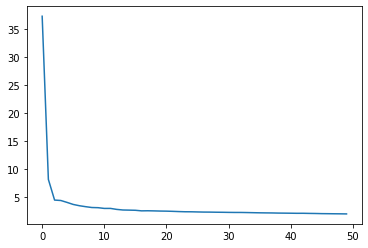

In [13]:
import matplotlib.pyplot as plt

plt.plot(w)

## Recordando cambios de base y otros yuyos

Sup $M_X$ es la matriz de la covarianza, 

$$ M_X = \frac{X^T X}{n-1} $$

Si $B = \{v_1, \ldots , v_n\}$ es la base ortogonal de autovectores de $M_X$ entonces la matriz cambio de base de $B$ a la base canónica ($E$) se escribe como la matriz cuyas columnas son los respectivos vectores

$$C_{B, E} = V = \begin{bmatrix}
        &     & \ldots &     \\
    v_1 & v_2 & \ldots & v_n \\
        &     & \ldots &     \\
\end{bmatrix}
$$


La matriz inversa de ésta es la cambio de base de $E$ a $B$. Es decir $C_{E, B} = C_{B, E}^{-1}$. Como nuestra base es ortogonal, tenemos

$$ C_{E, B} = C_{B, E}^T = V^T = \begin{bmatrix}
& & v_1   & &\\
& & v_2   & &\\
& &\vdots & & \\
& & v_n   & & \\
\end{bmatrix}
$$

Es decir, la matriz que consiste de apilar los vectores fila de la base $B$.


### Cambiando de base nuestras instancias de entrenamiento

Nuestras matrices $X \in R^{n \times m}$ con $n$ igual a la cantidad de instancias de entrenamiento, y $m$ la cantidad de variables

Tenemos entonces

$$ X = \begin{bmatrix}
& & x^{(1)}   & &\\
& & x^{(2)}   & &\\
& &\vdots & & \\
& & v_n   & & \\
\end{bmatrix}
$$

Si $x$ es una instancia de entrenamiento a la cual queremos cambiar de base, queremos hacer

$$\overline x = V^T x$$

Luego, si queremos cambiar de base cada instancia, hacemos...

$$ V^T X^T = V^T \begin{bmatrix}
        & &    & &\\
x^{(1)}& x^{(2)} &\ldots & x ^{(n-1)} & x ^{(n)} \\
& & & & \\
\end{bmatrix} = \begin{bmatrix}
        & &    & &\\
V^T x^{(1)}& V^T x^{(2)} &\ldots & V^T x ^{(n-1)} & V^T x ^{(n)} \\
& & & & \\
\end{bmatrix} = \begin{bmatrix}
        & &    & &\\
\overline{x^{(1)}}& \overline{x^{(2)}} &\ldots & \overline{x^{(n-1)}} & \overline{x^{(n)}} \\
& & & & \\
\end{bmatrix}
$$

Ahora, lo que necesitamos es que cada instancia esté en una fila, así que trasponemos

$$
\overline{X} = (V^T X^T)^T = X V
$$

## Ejercicio:

1. Implementar el cambio de base usando su implementación del método de la potencia
2. Experimentar con distintos $\alpha$. ¿Cómo afecta la accuracy de nuestro algoritmo? ¿Es más rápido (en tiempo)?

In [14]:
V.shape

(6000, 50)

In [ ]:
X_pca_train = X_train @ V[:, :30]
X_pca_test = X_test @ V[:, :30]

Entrenar ahora el clasificador usando estas nuevas instancias[]

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X_pca_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [17]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_pca_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.778
CPU times: user 2.11 s, sys: 1.15 ms, total: 2.11 s
Wall time: 2.11 s
